In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [12]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14
})

In [142]:
def gauss(x, A, B, C, x_0):
    return A * np.exp(-B * (x-x_0) ** 2) + C

def linear_model(x,a,b):
    return a * x + b

# Laser char

Wirkungsgrad
0.3824397824394051
Laserschwelle
9.35623730194261
Laserschwelle SS Laser
671.7477720114705
FWHM 1
34.113741580071
24.121826671268202
FWHM 2
33.26659918729302
23.52281228533489
Angle max
0.22882882882882882 13.110926122813432
Angle pi
0.3553833328049718
Angle pi/2
0.29223168099278723


/var/folders/6r/58697_t90t94wvdzw0xdvzj00000gn/T/ipykernel_37632/1405964984.py:2: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-B * (x-x_0) ** 2) + C


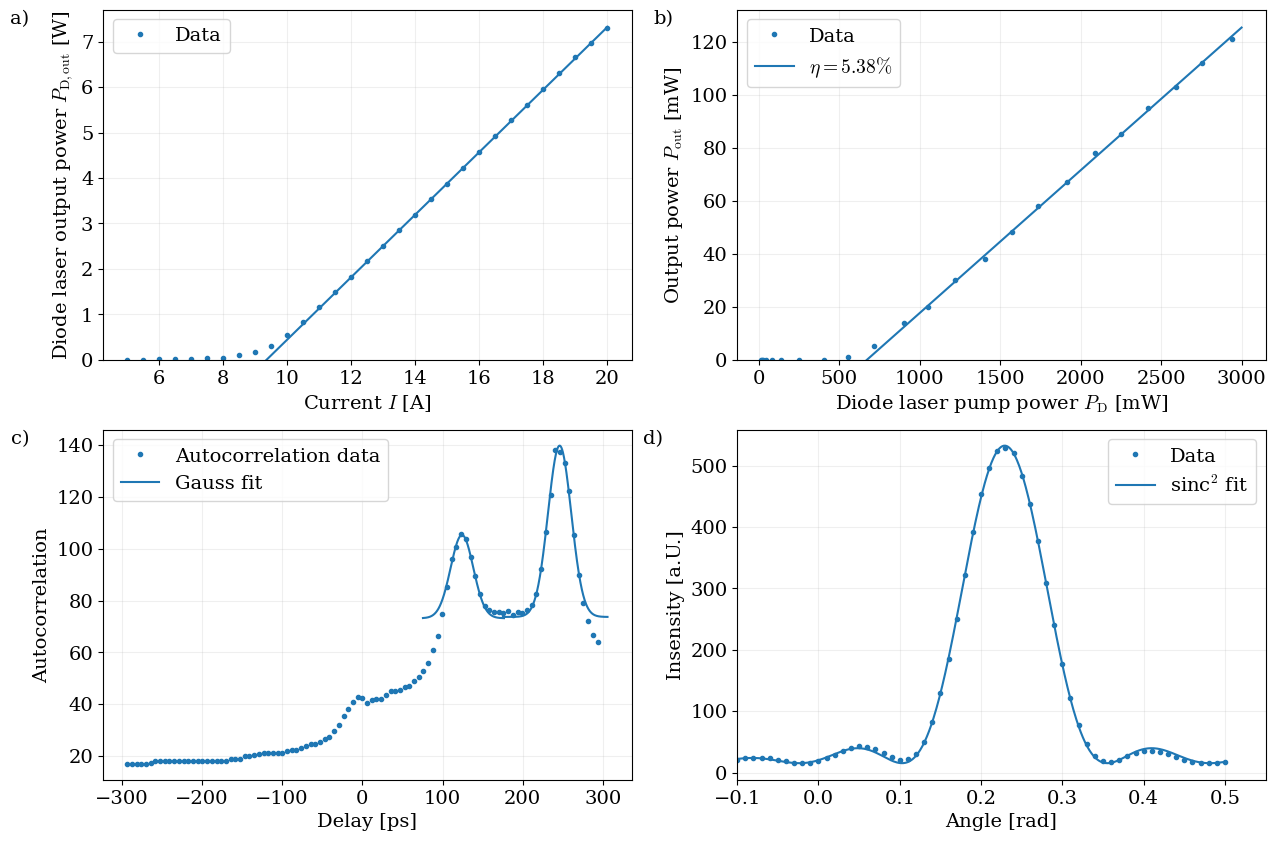

In [159]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["mathtext.fontset"] = "cm"


P_SS = [0,0,0,0,0,0,0,0,1,5,14,20,30,38,48,58,67,78,85,95,103,112,121]
P_d = [14, 17.1, 23.8, 44.4, 81.3, 137, 248, 407, 556, 716, 901, 1052, 1221, 1402, 1573, 1737, 1914, 2087, 2253, 2420, 2595, 2755, 2941]

I_diode = np.arange(5, 20.5, 0.5)
P_diode = 2*np.array([0,2.1,4.2,6.7,10.3,15.2,21.4,46.6,88.2,152.5,276.2,413.2,581.9,750.6,907.4,1086,1253,1432,1596,1773,1935,2107,2285,2460,2637,2808,2979,3157,3331,3485,3647]) / 1000

fig, axes = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4= axes.flatten()

ax1.text(-0.14, 1, "a)", transform=ax1.transAxes,fontsize=14, va='top', ha='right')
ax2.text(-0.12, 1, "b)", transform=ax2.transAxes,fontsize=14, va='top', ha='right')
ax3.text(-0.14, 1, "c)", transform=ax3.transAxes,fontsize=14, va='top', ha='right')
ax4.text(-0.14, 1, "d)", transform=ax4.transAxes,fontsize=14, va='top', ha='right')


ax1.plot(I_diode, P_diode, ".", label="Data")
ax1.grid(alpha=0.2)
ax1.set_ylabel("Diode laser output power $P_\mathrm{D,out}$ [W]")
ax1.set_xlabel("Current $I$ [A]")

popt, pcov = curve_fit(linear_model, I_diode[-12:], P_diode[-12:])
x = np.linspace(9, 20, 100)
ax1.plot(x, linear_model(x, *popt), color="C0")
ax1.legend()
ax1.set_ylim(0)

print("Wirkungsgrad")
print(popt[0]/1.8)
print("Laserschwelle")
print(-popt[1]/popt[0])

ax2.plot(P_d, P_SS, ".", label="Data")
ax2.grid(alpha=0.2)
ax2.set_xlabel("Diode laser pump power $P_\mathrm{D}$ [mW]")
ax2.set_ylabel("Output power $P_\mathrm{out}$ [mW]")


popt, pcov = curve_fit(linear_model, P_d[-12:], P_SS[-12:])
x = np.linspace(500, 3000, 100)
ax2.plot(x, linear_model(x, *popt), color="C0", label=f"$\eta={np.round(popt[0]*100,2)}\%$")
ax2.legend()
ax2.set_ylim(0)

print("Laserschwelle SS Laser")
print(-popt[1]/popt[0])

delay__ps, value, valueErr = np.loadtxt("Data/Autocorr",unpack=True, skiprows=2)

ax3.plot(delay__ps, value, ".", label="Autocorrelation data")
ax3.grid(alpha=0.2)
ax3.set_ylabel("Autocorrelation")
ax3.set_xlabel("Delay [ps]")

delay_min = 200
delay_max = 280
delay__ps_fit = delay__ps[np.where(delay__ps>delay_min)[0][0]:np.where(delay__ps>delay_max)[0][0]]
value_fit = value[np.where(delay__ps>delay_min)[0][0]:np.where(delay__ps>delay_max)[0][0]]

popt_622, pcov_622 = curve_fit(gauss, delay__ps_fit, value_fit, p0=[100, 2, 20, 250])
x = np.linspace(delay__ps_fit[0]-30, delay__ps_fit[-1]+30, 1000)
ax3.plot(x, gauss(x, *popt_622), label="Gauss fit", color="C0")

print("FWHM 1")
print(2*np.sqrt(np.log(2)/popt_622[1]))
print(0.7071* 2*np.sqrt(np.log(2)/popt_622[1]))

delay_min = 100
delay_max = 150
delay__ps_fit = delay__ps[np.where(delay__ps>delay_min)[0][0]:np.where(delay__ps>delay_max)[0][0]]
value_fit = value[np.where(delay__ps>delay_min)[0][0]:np.where(delay__ps>delay_max)[0][0]]

popt_622, pcov_622 = curve_fit(gauss, delay__ps_fit, value_fit, p0=[100, 2, 20, 125])
x = np.linspace(delay__ps_fit[0]-30, delay__ps_fit[-1]+30, 1000)
ax3.plot(x, gauss(x, *popt_622), color="C0")
ax3.legend()

print("FWHM 2")
print(2*np.sqrt(np.log(2)/popt_622[1]))
print(0.7071* 2*np.sqrt(np.log(2)/popt_622[1]))

angle, value, valueErr = np.loadtxt("Data/phasematching",unpack=True, skiprows=2)

def sincc(x, a, b, c, x_0):
    return a * np.sinc(b*(x-x_0)) ** 2 + c

plt.plot(angle, value, ".", label="Data")

popt, pcov = curve_fit(sincc, angle, value, p0=[500, 0.5, 10, 0.2])

x = np.linspace(-0.4, 0.5, 1000)
ax4.plot(x, sincc(x, *popt), color="C0", label="sinc$^2$ fit")
ax4.grid(alpha=0.2)
ax4.set_xlabel("Angle [rad]")
ax4.legend()
ax4.set_ylabel("Insensity [a.U.]")
ax4.set_xlim(-0.1)

print("Angle max")
angle_max = x[np.argmax(sincc(x, *popt))]
print(angle_max, np.rad2deg(angle_max))
print("Angle pi")
print(1/popt[1] + popt[3])
print("Angle pi/2")
print(1/popt[1]/2 + popt[3])

plt.savefig('Laser.pdf', bbox_inches='tight')  

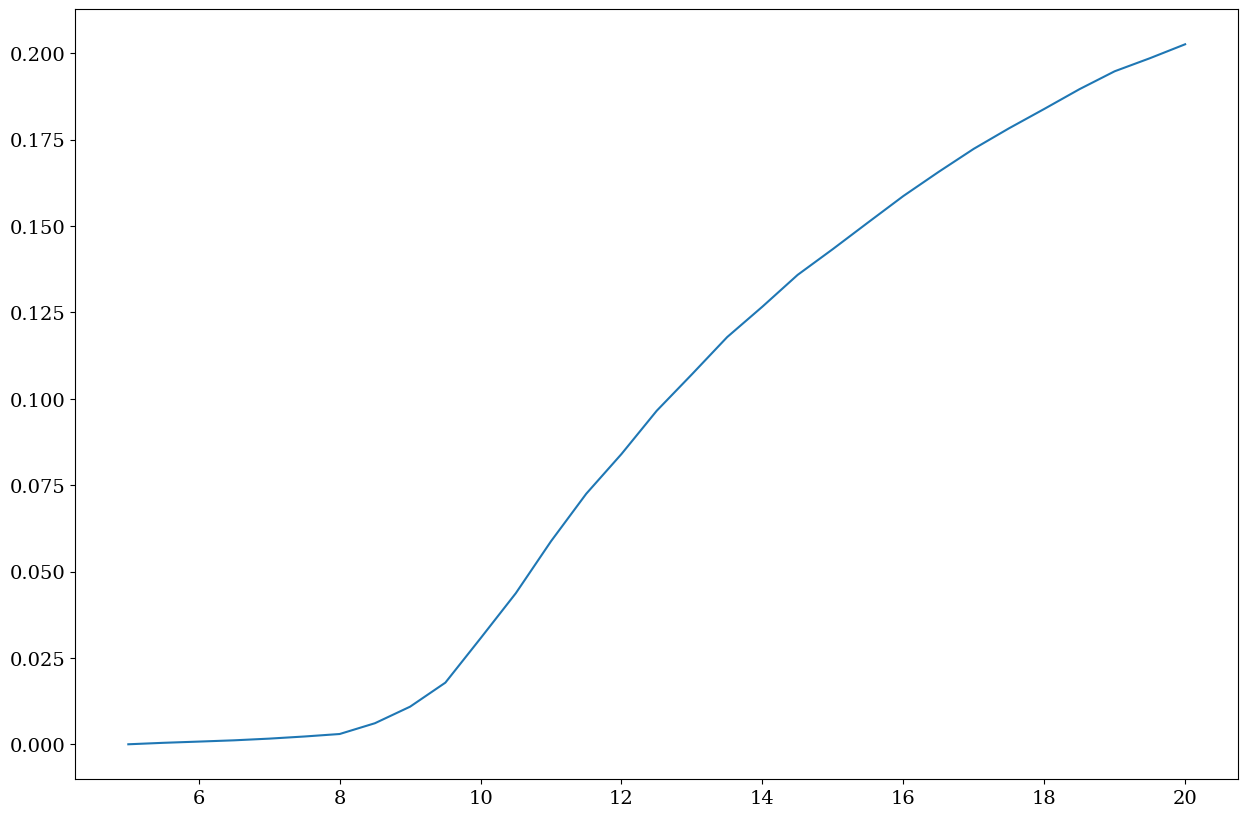

In [153]:
plt.plot(I_diode, P_diode/(I_diode*1.8))

/var/folders/6r/58697_t90t94wvdzw0xdvzj00000gn/T/ipykernel_37632/1405964984.py:2: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-B * (x-x_0) ** 2) + C


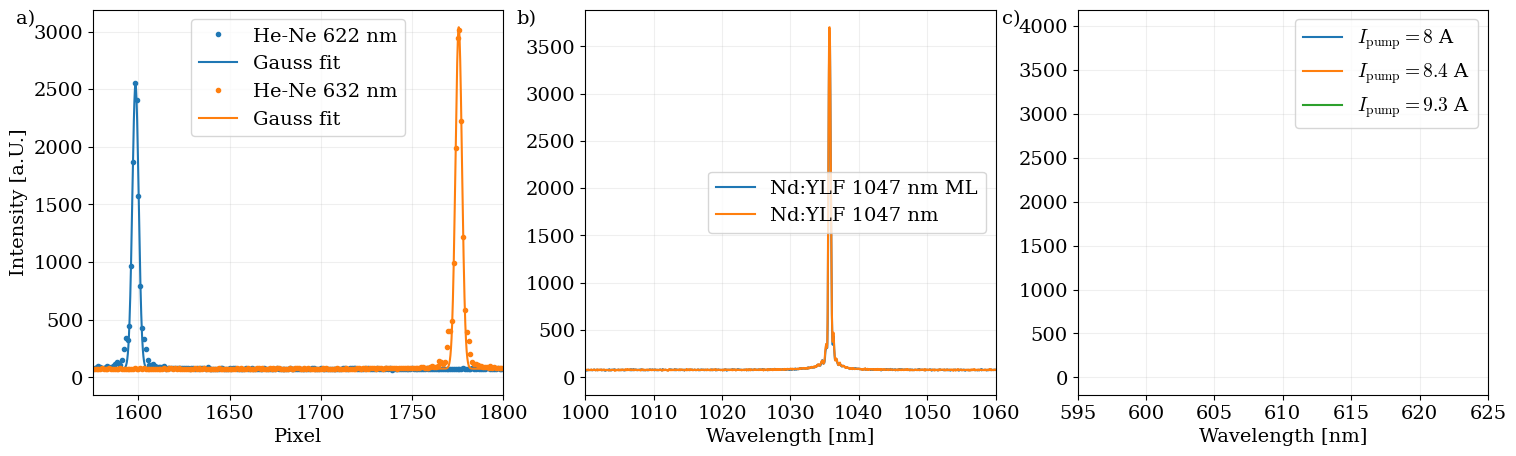

In [167]:
plt.rcParams["figure.figsize"] = (18,5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.text(-0.14, 1, "a)", transform=ax1.transAxes,fontsize=14, va='top', ha='right')
ax2.text(-0.12, 1, "b)", transform=ax2.transAxes,fontsize=14, va='top', ha='right')
ax3.text(-0.14, 1, "c)", transform=ax3.transAxes,fontsize=14, va='top', ha='right')

pixel, value = np.loadtxt("Data/Spectrometer_622.txt",unpack=True, skiprows=3, delimiter=",")

ax1.plot(pixel, value, ".", label="He-Ne 622 nm")
popt_622, pcov_622 = curve_fit(gauss, pixel, value, p0=[2500, 2, 20, 1600])
x = np.linspace(1500, 1650, 1000)
ax1.plot(x, gauss(x, *popt_622), label="Gauss fit", color="C0")
px_0 = pixel[np.argmax(value)]


pixel, value = np.loadtxt("Data/Spectrometer_632.txt",unpack=True, skiprows=3, delimiter=",")

ax1.plot(pixel, value, ".", label="He-Ne 632 nm")
popt_632, pcov_632 = curve_fit(gauss, pixel, value, p0=[2500, 2, 20, 1775])
x = np.linspace(1750, 1800, 1000)
ax1.plot(x, gauss(x, *popt_632), label="Gauss fit", color="C1")

ax1.set_xlabel("Pixel")
ax1.legend()
ax1.set_ylabel("Intensity [a.U.]")
ax1.grid(alpha=0.2)
ax1.set_xlim(1575, 1800)
px_1 = pixel[np.argmax(value)]
#plt.show()

def wavelength(p):
    a = 10 / (px_1-px_0)
    b = 632 - a * px_1
    return 1047 - 0.2 - a * (p-px_0)

wavelen_nm = wavelength(pixel)

pixel, value = np.loadtxt("Data/Spectrometer_Ndyf_1047_ml.txt",unpack=True, skiprows=3, delimiter=",")
ax2.plot(wavelen_nm, value, label="Nd:YLF 1047 nm ML")
pixel, value = np.loadtxt("Data/Spectrometer_Ndyf_1047.txt",unpack=True, skiprows=3, delimiter=",")
ax2.plot(wavelen_nm, value, label="Nd:YLF 1047 nm ")
ax2.legend()
ax2.set_xlabel("Wavelength [nm]")
ax2.grid(alpha=0.2)
ax2.set_xlim(1000, 1060)
pixel, value = np.loadtxt("Data/Spectrometer_pump_8.0.txt",unpack=True, skiprows=3, delimiter=",")
ax3.plot(wavelen_nm, value, label="$I_\mathrm{pump}=8$ A")
pixel, value = np.loadtxt("Data/Spectrometer_pump_8.4.txt",unpack=True, skiprows=3, delimiter=",")
ax3.plot(wavelen_nm, value, label="$I_\mathrm{pump}=8.4$ A")
pixel, value = np.loadtxt("Data/Spectrometer_pump_9.3.txt",unpack=True, skiprows=3, delimiter=",")
ax3.plot(wavelen_nm, value, label="$I_\mathrm{pump}=9.3$ A")
ax3.set_xlim(595, 625)
ax3.set_xlabel("Wavelength [nm]")
ax3.grid(alpha=0.2)
ax3.legend()
plt.savefig('sslaser.pdf', bbox_inches='tight')  
